<a href="https://colab.research.google.com/github/Nikkiie/Bike-sharing-demand-prediction-Cap-2-/blob/main/Individual_colab_bike_sharing_demand_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PROJECT TITLE - Seoul Bike Sharing Demand Prediction** 

### Importing Libraries

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
#Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Giving the file path

file_path = ('/content/drive/MyDrive/cap 2/SeoulBikeData (1).csv')
df = pd.read_csv(file_path, encoding = 'ISO-8859-1',parse_dates=['Date'])

### Dataset First View

In [4]:
# It is a good habit to copy the data for backup
df = df.copy()

In [5]:
# Checking top 5 rows in dataframe
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# Checking last 5 rows in dataframe
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [7]:
# Data shape
df.shape

(8760, 14)

In [8]:
#Check all the coloumns present in our dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### Dataset Information

In [9]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

#### Duplicate Values

In [10]:
# Checking duplicates
print(len(df[df.duplicated()]))

0


#### Missing Values/Null Values

In [11]:
# Missing data counts
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### Understanding Your Variables

In [12]:
# Statistical information

df.describe(include='all').transpose()

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Date,8760,365,2017-01-12 00:00:00,24,2017-01-12,2018-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,NaT,NaT,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,NaT,NaT,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,NaT,NaT,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,NaT,NaT,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,NaT,NaT,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,NaT,NaT,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,NaT,NaT,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,NaT,NaT,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,NaT,NaT,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


### Checking Unique Values

In [13]:
#checking unique values

df.columns.unique()

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### EDA

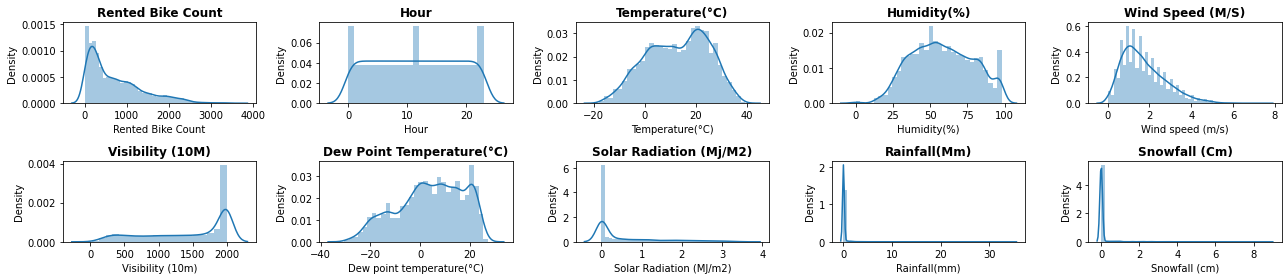

In [14]:
# Visualizing the distributions.
plt.figure(figsize=(18,4))
for n,column in enumerate(df.describe().columns):
  plt.subplot(2, 5, n+1)
  sns.distplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

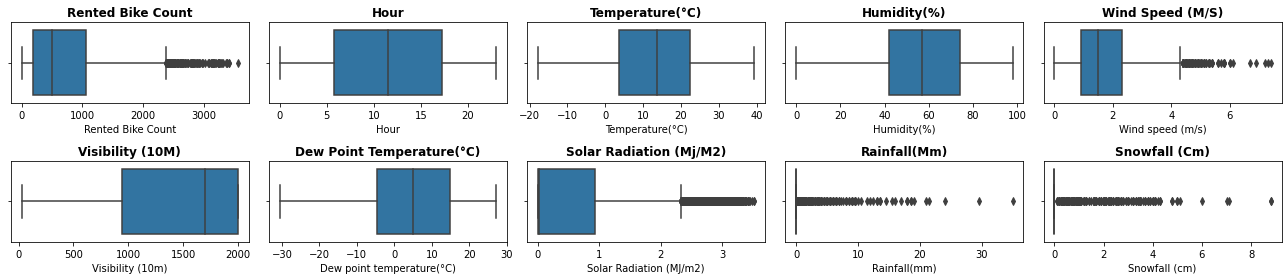

In [15]:
# Checking for outliers
plt.figure(figsize=(18,4))
for n,column in enumerate(df.describe().columns):
  plt.subplot(2, 5, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

Count of rented bikes per hour, daily and monthly basis.

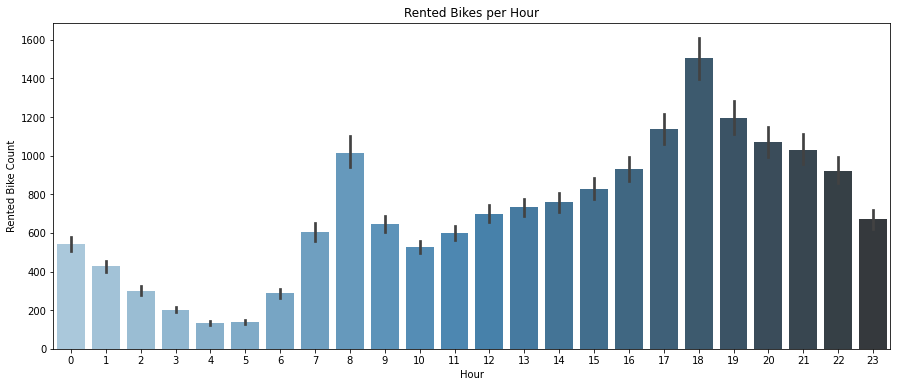

In [16]:
# plotting count of rented bikes per hour.
plt.figure(figsize=[15,6])
plt.title('Rented Bikes per Hour')
sns.barplot(data=df, x='Hour', y='Rented Bike Count', palette="Blues_d")

Bike rented in hours in different seasons..

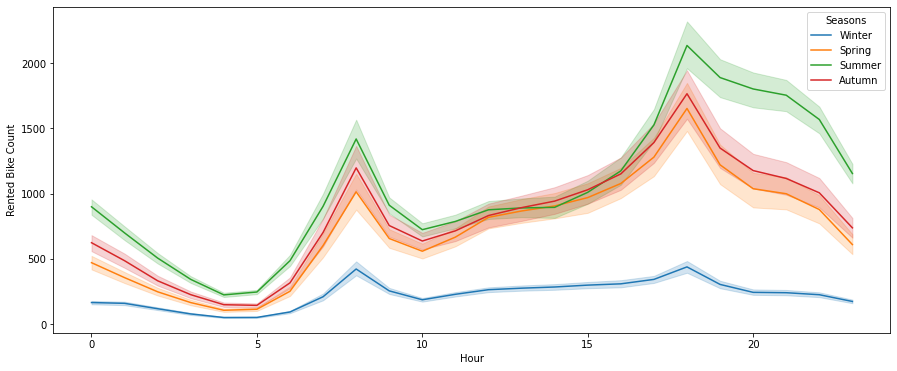

In [17]:
plt.figure(figsize=[15,6])
sns.lineplot(data=df, x='Hour', y='Rented Bike Count', hue='Seasons')

Demand of bike at different temperature

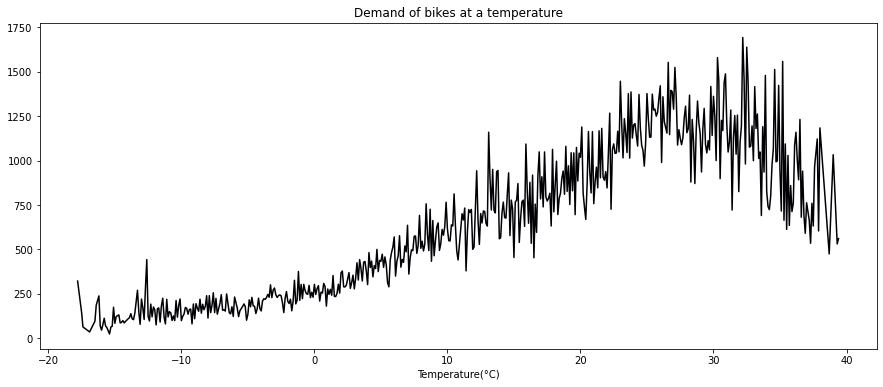

In [18]:
# plotting the affect of temperature on demand of bikes.

df.groupby('Temperature(°C)')['Rented Bike Count'].mean().plot(figsize=[15,6], title='Demand of bikes at a temperature', colormap='inferno')

Demand of bike at solar radiation

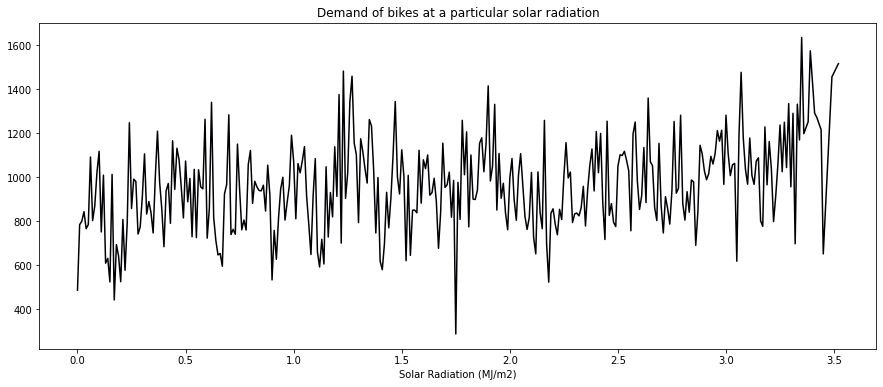

In [19]:
# Solar Radiation vs Count of rented bikes
df.groupby('Solar Radiation (MJ/m2)')['Rented Bike Count'].mean().plot(figsize=[15,6], title='Demand of bikes at a particular solar radiation', colormap='inferno')

Demand of bikes at ranifall

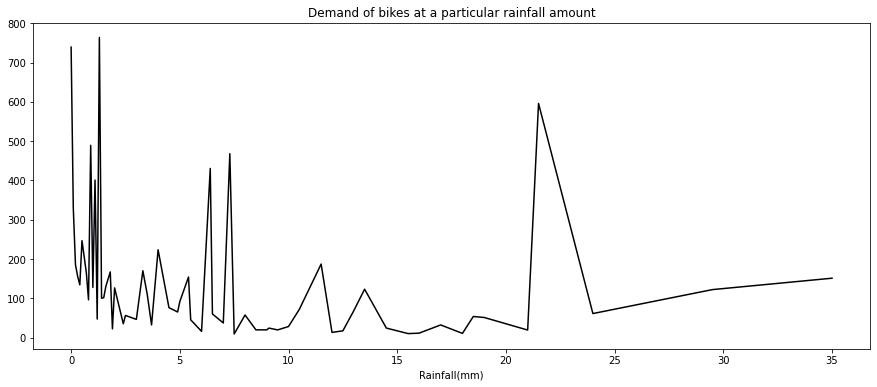

In [20]:
# Rainfall vs Count of rented bikes
df.groupby('Rainfall(mm)')['Rented Bike Count'].mean().plot(figsize=[15,6], title='Demand of bikes at a particular rainfall amount',colormap='inferno')


Demand of bikes at snowfall

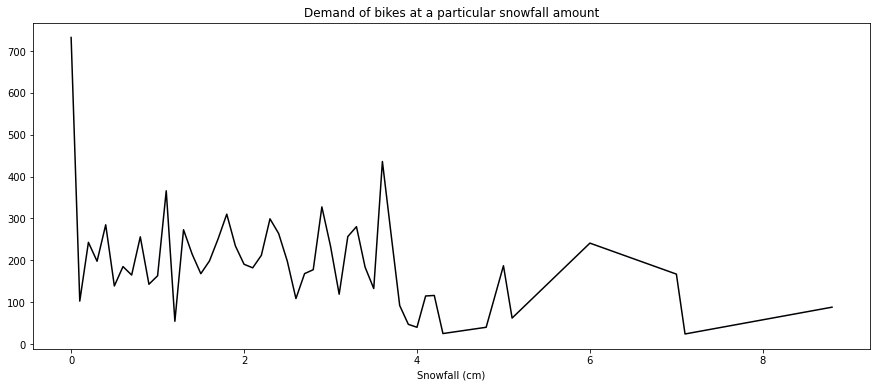

In [21]:
# Snowfall vs Count of rented bikes
df.groupby('Snowfall (cm)')['Rented Bike Count'].mean().plot(figsize=[15,6], title='Demand of bikes at a particular snowfall amount',colormap='inferno')

Bike rented in different seasons.

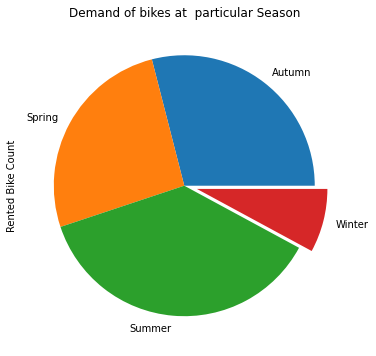

In [22]:
# Season wise demand of bikes.

df.groupby('Seasons')['Rented Bike Count'].sum().plot(kind='pie', figsize=[10,6], title='Demand of bikes at  particular Season',explode = [0,0,0,0.1])

In [23]:
# Extracting new features from date and hour column
df['weekend'] = df['Date'].apply(lambda x : 1 if (x.day_name()=='Saturday' or x.day_name()=='Sunday') else 0 )
df['timeshift'] = df['Hour'].apply(lambda x: 'night' if 0<=x<=6 else ('day' if 7<=x<=16 else 'evening'))

In [24]:
# Dropping the Date column
df.drop(columns=['Date'], inplace = True)

In [25]:
# Lets take care of the categorical features
categorical_features = [i for i in df.columns if i not in df.describe().columns]
categorical_features

['Seasons', 'Holiday', 'Functioning Day', 'timeshift']

In [26]:
# Checking unique value with their counts in categorical features
for col in categorical_features:
  print(df[col].value_counts(),'\n')

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64 

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64 

Yes    8465
No      295
Name: Functioning Day, dtype: int64 

day        3650
night      2555
evening    2555
Name: timeshift, dtype: int64 



In [27]:
# Defining a label encoder based on above data
encoder = {'Holiday':{'Holiday':1, 'No Holiday':0},'Functioning Day':{'Yes':1, 'No': 0},
          'timeshift': {'night':0, 'day':1, 'evening':2}}

In [30]:
# Label Encoding
df = df.replace(encoder)



In [31]:
# One Hot Encoding
df = pd.get_dummies(df, columns=['Seasons'], prefix='', prefix_sep='')

In [32]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,weekend,timeshift,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1


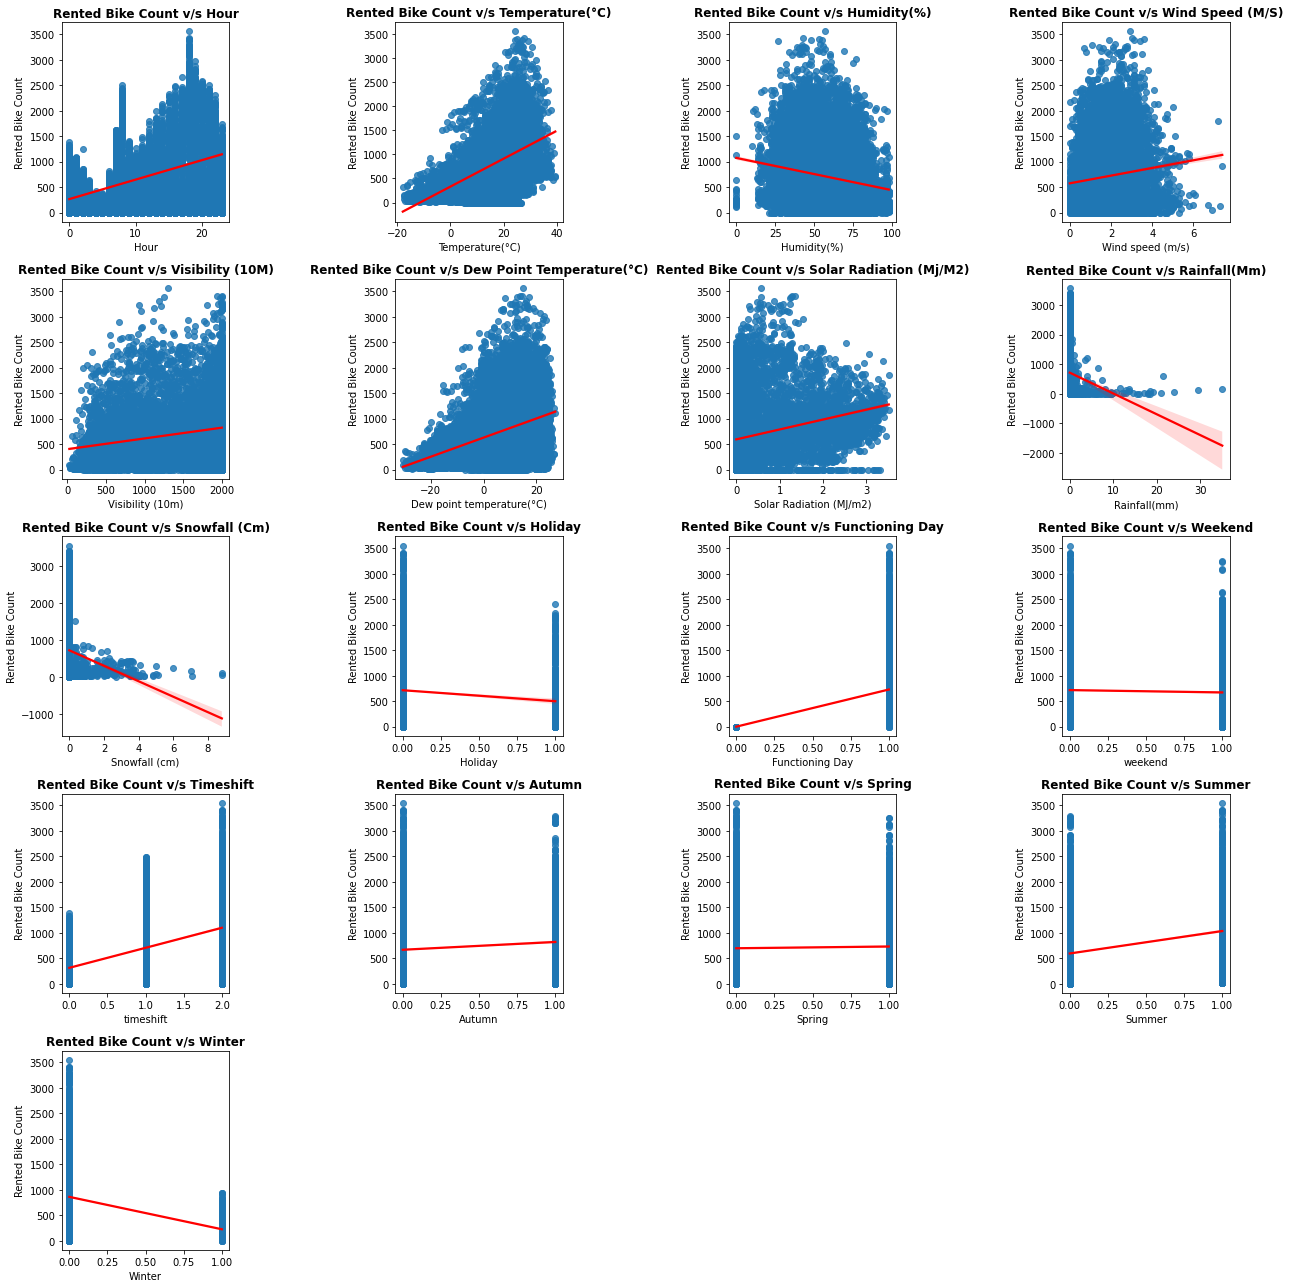

In [33]:
independent_variables = [i for i in df.columns if i not in ['Rented Bike Count']]

# Checking Linearity
plt.figure(figsize=(18,18))
for n,column in enumerate(independent_variables):
  plt.subplot(5, 4, n+1)
  sns.regplot(data = df, x = column, y ='Rented Bike Count',line_kws={"color": "red"})
  plt.title(f'Rented Bike Count v/s {column.title()}',weight='bold')
  plt.tight_layout()

In [36]:
# Defining a function to calculate Variance Inflation factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

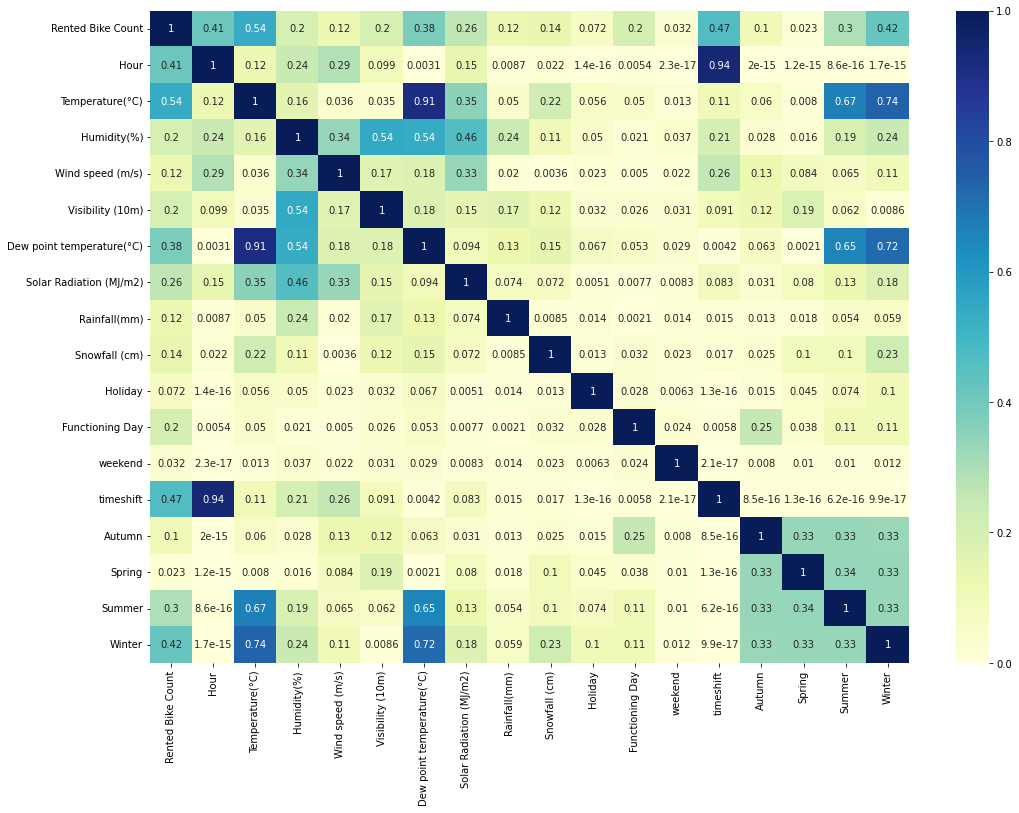

In [37]:
# plotting heatmap
plt.figure(figsize=[17,12])
sns.heatmap(abs(df.corr()), annot=True, cmap='YlGnBu')

In [38]:
# Checking VIF for each variable
independent_variables = [i for i in df.columns if i not in ['Rented Bike Count']]
calc_vif(df[independent_variables])

,variables,VIF
0,Dew point temperature(°C),117.828103
1,Summer,114.186068
2,Spring,110.721170
3,Autumn,108.717137
4,Winter,105.892752
5,Temperature(°C),89.818830
6,Humidity(%),20.657420
7,Hour,8.779547
8,timeshift,8.558242
9,Solar Radiation (MJ/m2),2.071180


In [39]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'weekend', 'timeshift', 'Autumn', 'Spring', 'Summer',
       'Winter'],
      dtype='object')

In [40]:
# Summer and Winter are highly correlated with temperature. Hence removing them
independent_variables = [i for i in df.columns if i not in ['Rented Bike Count','Winter','Summer','Dew point temperature(°C)','Hour','Humidity']]
calc_vif(df[independent_variables])

,variables,VIF
0,Functioning Day,19.380118
1,Humidity(%),12.210675
2,Visibility (10m),7.211359
3,Wind speed (m/s),4.721764
4,Temperature(°C),3.397298
5,timeshift,2.999360
6,Solar Radiation (MJ/m2),2.504923
7,Autumn,1.580398
8,Spring,1.555026
9,weekend,1.401570


In [41]:
# Updating the dataset
dataset = df[independent_variables + ['Rented Bike Count']]

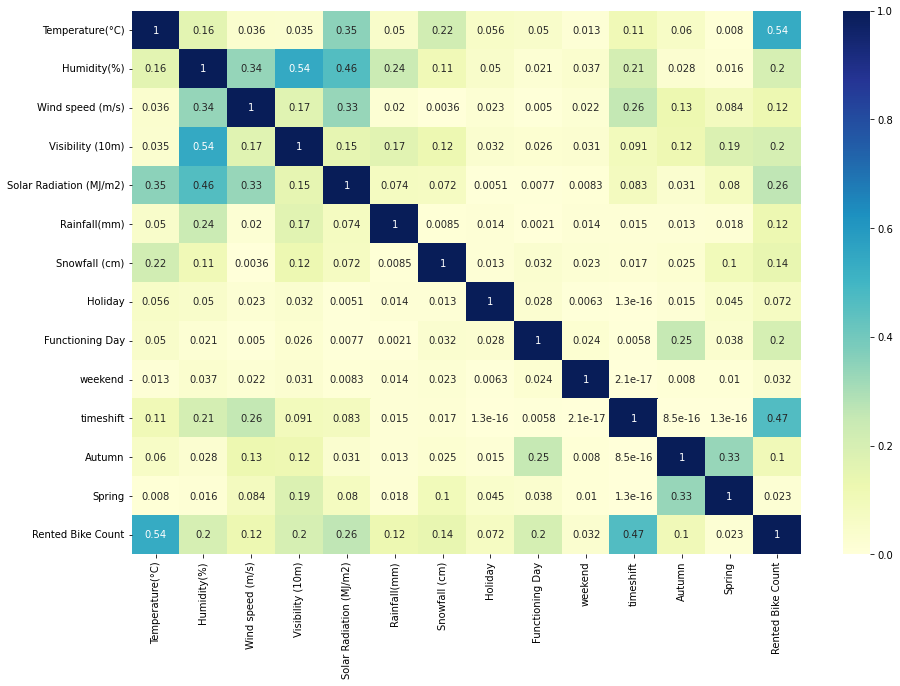

In [42]:
plt.figure(figsize=[15,10])
sns.heatmap(abs(dataset.corr()), annot=True, cmap='YlGnBu')

In [44]:
# Checking top 5 rows of the cleaned dataset
dataset.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,weekend,timeshift,Autumn,Spring,Rented Bike Count
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,0,0,0,0,254
1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,0,0,0,0,204
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,0,0,0,173
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,0,0,0,0,107
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,0,0,0,0,78


Model building
Prerequisites

In [45]:
# Defining variables required
scaler = MinMaxScaler()
y = np.sqrt(df['Rented Bike Count'])
features = [i for i in df.columns if i not in ['Rented Bike Count']]

In [46]:
# Defining a function to train the input model and print evaluation matrix
def analyse_model(model, X_train, X_test, y_train, y_test):

  '''Takes regressor model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''

  # Fitting the model
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  a,p = y_test**2,y_pred**2

  # Calculating Evaluation Matrix
  mse = mean_squared_error(a,p)
  rmse = np.sqrt(mse)
  r2 = r2_score(a,p)
  try:
    importance = model.feature_importances_
    feature = features
  except:
    importance = np.abs(model.coef_)
    feature = independent_variables
  indices = np.argsort(importance)
  indices = indices[::-1]

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mean_absolute_error(a,p))
  print("Train R2 :", r2_score(y_train**2,model.predict(X_train)**2))
  print("Test R2 :" ,r2)
  #print("Adjusted R2 : ", 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)))

  # Plotting actual and predicted values and the feature importances:
  plt.figure(figsize=(18,6))
  plt.subplot(2,1,1)
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Bike Counts')
  plt.subplot(2,1,2)
  plt.bar(range(len(indices)),importance[indices])
  plt.xticks(range(len(indices)), [feature[i] for i in indices])
  plt.title('Feature Importance')
  plt.tight_layout()
  plt.show()

  return model

In [47]:
# Providing the range of values for hyperparameters such as Number of trees:
n_estimators = [50,100,150]

# Maximum depth of trees:
max_depth = [6,8,10]

# Minimum number of samples required to split a node:
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node:
min_samples_leaf = [40,50]

# Learning rate:
eta = [0.05,0.08,0.1]

Linear Regression

In [48]:
# Splitting the data into train and test
X = scaler.fit_transform(df[independent_variables])
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)

MSE : 152075.95812925827
RMSE : 389.96917587068117
MAE : 261.1524160452328
Train R2 : 0.6284278727604089
Test R2 : 0.6366361999936747


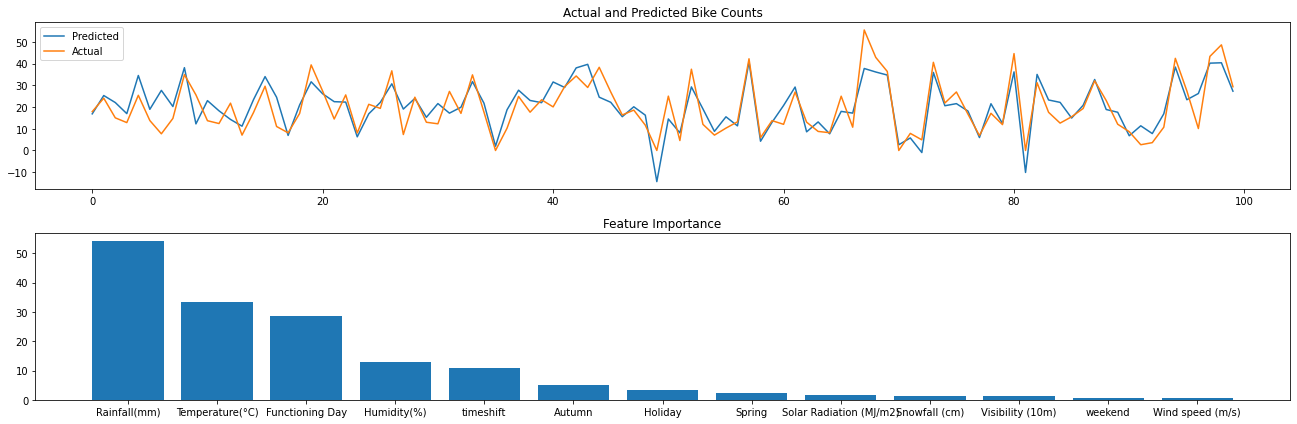

LinearRegression()

In [49]:
# Fitting Linear Regression Model
lr = LinearRegression()
analyse_model(lr, X_train, X_test, y_train, y_test)